<a href="https://colab.research.google.com/github/antonellafontanetto/Pre-Entrega-3/blob/main/Notebooks/Proyecto4x4YPF-con%20outliers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Proyecto 4x4 YPF - Primer pilar Vaca Muerta**

El proyecto busca seguir la linea de pensamiento de desarrollo de la compañía YPF, en la actualidad este proyecto plantea cuadruplicar el crecimiento de la firma en los próximos 4 años. El objetivo esta centrado en 4 pilares, del cual solo vamos a focalizar en el primero, que es el crecimiento de Vaca Muerta a corto plazo.

La estrategia se basa en reducir costos operativos, optimizar los tiempos de perforación y adoptar un enfoque más eficiente en la gestión financiera. La compañía ha logrado reducir los tiempos de perforación de aproximadamente un año a 170 días, mediante mejoras técnicas y operativas.

Este plan de transformación busca posicionar a YPF como una empresa más eficiente, rentable y alineada con las tendencias internacionales del sector energético, con una visión clara en el desarrollo del shale en Argentina.


## **Modelado**

En la pre entrega 2, realizamos la transformación de todas las features utilizando One Hot Encoder, ahora vamos a limpiar y decidir en función al análisis exploratorio que features tener en consideración para el modelo.

Como observamos anteriormente tanto la producción de petróleo como la producción de gas son dos datos que queremos predecir para los próximos 4 años, sin embargo el análisis estará centrado en la Cuenca Neuquina, es decir, Vaca Muerta y las cinco principales áreas de permiso de concesión tanto para la producción de petróleo como para la producción de gas.

Así como también tenemos que mencionar que el dataset está centrado únicamente en la producción de lo no convencional, es decir, de aquella extracción que requiere tecnologías más avanzadas, costosas o intensivas en recursos debido a las características del yacimiento o del propio hidrocarburo.

Finalmente, cabe mencionar que la producción de petróleo y gas se sujeta a dos subtipos de recursos, estos son shale y tight, los mismos se diferencian según el tipo de roca y suelen requerir técnicas como la fractura hidráulica (fracking) para su extracción. Mientras que el shale se extrae de la roca sedimentaria rica en materia orgánica que actúa como fuente y reservorio del hidrocarburo, el tight se encuentra en rocas porosas pero de baja permeabilidad, como areniscas o calizas muy cementadas.


In [1]:
#descargamos todas las librerías necesarias para el desarrollo del proyecto
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
#Cargamos el dataset transformado en la segunda pre-entrega
Produccion_ypf = pd.read_csv('/content/prod_encoded_df.csv')

#Aplicamos la función head() para visualizar las primeras 5 observaciones del dataset
Produccion_ypf.head().astype(int)

,Tipo de pozo_Gasífero,Tipo de pozo_Inyección de Agua,Tipo de pozo_Otro tipo,Tipo de pozo_Petrolífero,Tipo de pozo_Sumidero,Tipo de recurso_NO CONVENCIONAL,Subtipo de recurso_SHALE,Subtipo de recurso_TIGHT,Area de permiso de concesion_AGUADA DE LA ARENA,Area de permiso de concesion_AGUADA DEL CHAÑAR,...,Area de permiso de concesion_PASO DE LAS BARDAS NORTE,Area de permiso de concesion_RINCON DEL MANGRULLO,Area de permiso de concesion_RIO NEUQUEN,Area de permiso de concesion_VALLE DEL RIO GRANDE,Produccion de Petroleo,Produccion de Gas,Producción de agua,Profundidad,Mes,Año
0,1,0,0,0,0,1,0,1,0,0,...,0,0,0,0,32,172,0,3844,2025,1
1,0,0,1,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,2827,2025,1
2,0,0,1,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,2977,2025,1
3,0,0,1,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,4092,2025,1
4,0,0,0,1,0,1,1,0,0,0,...,0,0,0,0,55,3,0,4945,2025,1


In [3]:
#Con la función columns podemos observar mejor el nombre de todas las columnas del dataset, que en este caso son 47 columnas
Produccion_ypf.columns.tolist()

['Tipo de pozo_Gasífero',
 'Tipo de pozo_Inyección de Agua',
 'Tipo de pozo_Otro tipo',
 'Tipo de pozo_Petrolífero',
 'Tipo de pozo_Sumidero',
 'Tipo de recurso_NO CONVENCIONAL',
 'Subtipo de recurso_SHALE',
 'Subtipo de recurso_TIGHT',
 'Area de permiso de concesion_AGUADA DE LA ARENA',
 'Area de permiso de concesion_AGUADA DEL CHAÑAR',
 'Area de permiso de concesion_AL NORTE DE LA DORSAL',
 'Area de permiso de concesion_BAJO DEL TORO  ',
 'Area de permiso de concesion_BAJO DEL TORO NORTE',
 'Area de permiso de concesion_BANDURRIA SUR',
 'Area de permiso de concesion_CERRO ARENA ',
 'Area de permiso de concesion_CERRO LAS MINAS ',
 'Area de permiso de concesion_CERRO MANRIQUE',
 'Area de permiso de concesion_CHIHUIDO DE LA SIERRA NEGRA',
 'Area de permiso de concesion_CN VII A',
 'Area de permiso de concesion_DADIN',
 'Area de permiso de concesion_EL OREJANO',
 'Area de permiso de concesion_ESTACION FERNANDEZ ORO',
 'Area de permiso de concesion_FILO MORADO',
 'Area de permiso de conc

In [4]:
#Creamos una copia del dataset original
Produccion_ypf_copia = Produccion_ypf.copy()

columnas_a_eliminar = [
    'Tipo de pozo_Inyección de Agua',
    'Tipo de pozo_Otro tipo',
    'Tipo de pozo_Sumidero',
    'Tipo de recurso_NO CONVENCIONAL',
    'Producción de agua',
    'Area de permiso de concesion_AGUADA DEL CHAÑAR',
    'Area de permiso de concesion_AL NORTE DE LA DORSAL',
    'Area de permiso de concesion_BAJO DEL TORO',
    'Area de permiso de concesion_CERRO ARENA ',
    'Area de permiso de concesion_CERRO LAS MINAS ',
    'Area de permiso de concesion_CERRO MANRIQUE',
    'Area de permiso de concesion_CHIHUIDO DE LA SIERRA NEGRA',
    'Area de permiso de concesion_CN VII A',
    'Area de permiso de concesion_DADIN',
    'Area de permiso de concesion_BAJO DEL TORO NORTE',
    'Area de permiso de concesion_ESTACION FERNANDEZ ORO',
    'Area de permiso de concesion_FILO MORADO',
    'Area de permiso de concesion_LA ANGOSTURA SUR I',
    'Area de permiso de concesion_LA ANGOSTURA SUR II',
    'Area de permiso de concesion_LA RIBERA BLOQUE I',
    'Area de permiso de concesion_LA RIBERA BLOQUE II',
    'Area de permiso de concesion_LAS TACANAS'
]

#Con la función drop eliminamos las columnas que consideramos que no son necesarias para el análisis, en este caso solo dejamos las principales áreas de permiso de concesión por producción de petróleo y gas
Produccion_ypf = Produccion_ypf.drop(columns=columnas_a_eliminar, errors='ignore')

Produccion_ypf.head()

,Tipo de pozo_Gasífero,Tipo de pozo_Petrolífero,Subtipo de recurso_SHALE,Subtipo de recurso_TIGHT,Area de permiso de concesion_AGUADA DE LA ARENA,Area de permiso de concesion_BAJO DEL TORO,Area de permiso de concesion_BANDURRIA SUR,Area de permiso de concesion_EL OREJANO,Area de permiso de concesion_LA AMARGA CHICA,Area de permiso de concesion_LA RIBERA BLOQUE I,...,Area de permiso de concesion_OCTOGONO,Area de permiso de concesion_PASO DE LAS BARDAS NORTE,Area de permiso de concesion_RINCON DEL MANGRULLO,Area de permiso de concesion_RIO NEUQUEN,Area de permiso de concesion_VALLE DEL RIO GRANDE,Produccion de Petroleo,Produccion de Gas,Profundidad,Mes,Año
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,32.0,172.0,3844.0,2025.0,1.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2827.0,2025.0,1.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2977.0,2025.0,1.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4092.0,2025.0,1.0
4,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,55.0,3.0,4945.0,2025.0,1.0


In [5]:
#aplicamos astype para visualizar los datos en números enteros
Produccion_ypf.astype(int)

,Tipo de pozo_Gasífero,Tipo de pozo_Petrolífero,Subtipo de recurso_SHALE,Subtipo de recurso_TIGHT,Area de permiso de concesion_AGUADA DE LA ARENA,Area de permiso de concesion_BAJO DEL TORO,Area de permiso de concesion_BANDURRIA SUR,Area de permiso de concesion_EL OREJANO,Area de permiso de concesion_LA AMARGA CHICA,Area de permiso de concesion_LA RIBERA BLOQUE I,...,Area de permiso de concesion_OCTOGONO,Area de permiso de concesion_PASO DE LAS BARDAS NORTE,Area de permiso de concesion_RINCON DEL MANGRULLO,Area de permiso de concesion_RIO NEUQUEN,Area de permiso de concesion_VALLE DEL RIO GRANDE,Produccion de Petroleo,Produccion de Gas,Profundidad,Mes,Año
0,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,32,172,3844,2025,1
1,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,2827,2025,1
2,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,2977,2025,1
3,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,4092,2025,1
4,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,55,3,4945,2025,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56413,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2046,2024,12
56414,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1642,101,5889,2024,12
56415,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,2441,153,0,2024,12
56416,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,4491,2024,12


In [6]:
#Nuevamente aplicamos la función columns para visualizar como quedó el dataset con las columnas eliminadas, ahora son 29 columnas
Produccion_ypf.columns.tolist()

['Tipo de pozo_Gasífero',
 'Tipo de pozo_Petrolífero',
 'Subtipo de recurso_SHALE',
 'Subtipo de recurso_TIGHT',
 'Area de permiso de concesion_AGUADA DE LA ARENA',
 'Area de permiso de concesion_BAJO DEL TORO  ',
 'Area de permiso de concesion_BANDURRIA SUR',
 'Area de permiso de concesion_EL OREJANO',
 'Area de permiso de concesion_LA AMARGA CHICA',
 'Area de permiso de concesion_LA RIBERA BLOQUE I ',
 'Area de permiso de concesion_LA RIBERA BLOQUE II  ',
 'Area de permiso de concesion_LAS MANADAS',
 'Area de permiso de concesion_LAS TACANAS ',
 'Area de permiso de concesion_LOMA AMARILLA SUR',
 'Area de permiso de concesion_LOMA CAMPANA',
 'Area de permiso de concesion_LOMA DEL MOLLE',
 'Area de permiso de concesion_LOMA LA LATA - SIERRA BARROSA',
 'Area de permiso de concesion_LOS CALDENES',
 'Area de permiso de concesion_NARAMBUENA',
 'Area de permiso de concesion_OCTOGONO',
 'Area de permiso de concesion_PASO DE LAS BARDAS NORTE',
 'Area de permiso de concesion_RINCON DEL MANGRUL

### **Regresión Lineal**

La regresión lineal es un modelo estadístico utilizado para predecir el valor de una variable dependiente (objetivo) a partir de una o más variables independientes (predictoras). En su forma más simple (regresión lineal simple), ajusta una línea recta a los datos con la fórmula:

𝑦
=
𝑎
+
𝑏
⋅
𝑥


donde:

1.   y es la variable dependiente,
2.   x es la variable independiente,
3.   a es la intersección con el eje Y (intercepto),
4.   b es la pendiente de la recta (coeficiente).



In [7]:
Produccion_ypf_copia2 = Produccion_ypf.copy() #es la copia del dataframe nuevo que si contiene Produccion de petróleo y Producción de gas

In [8]:
#De la variable x eliminamos las features a predecir que son: Producción de Petróleo y Producción de Gas
x = Produccion_ypf.drop(['Produccion de Petroleo','Produccion de Gas'], axis=1)

In [9]:
#Visualizamos las primero 5 observaciones
x.head()

,Tipo de pozo_Gasífero,Tipo de pozo_Petrolífero,Subtipo de recurso_SHALE,Subtipo de recurso_TIGHT,Area de permiso de concesion_AGUADA DE LA ARENA,Area de permiso de concesion_BAJO DEL TORO,Area de permiso de concesion_BANDURRIA SUR,Area de permiso de concesion_EL OREJANO,Area de permiso de concesion_LA AMARGA CHICA,Area de permiso de concesion_LA RIBERA BLOQUE I,...,Area de permiso de concesion_LOS CALDENES,Area de permiso de concesion_NARAMBUENA,Area de permiso de concesion_OCTOGONO,Area de permiso de concesion_PASO DE LAS BARDAS NORTE,Area de permiso de concesion_RINCON DEL MANGRULLO,Area de permiso de concesion_RIO NEUQUEN,Area de permiso de concesion_VALLE DEL RIO GRANDE,Profundidad,Mes,Año
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3844.0,2025.0,1.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2827.0,2025.0,1.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2977.0,2025.0,1.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4092.0,2025.0,1.0
4,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4945.0,2025.0,1.0


In [10]:
lista_atributos = x.columns

In [11]:
#Determino que mi variable a predecir "y" está compuesta por las features Producción de Petróleo y Producción de Gas
y = Produccion_ypf[['Produccion de Petroleo','Produccion de Gas']]

In [12]:
x, y =np.array(x), np.array(y)

In [13]:
x

array([[1.000e+00, 0.000e+00, 0.000e+00, ..., 3.844e+03, 2.025e+03,
        1.000e+00],
       [0.000e+00, 0.000e+00, 1.000e+00, ..., 2.827e+03, 2.025e+03,
        1.000e+00],
       [0.000e+00, 0.000e+00, 1.000e+00, ..., 2.977e+03, 2.025e+03,
        1.000e+00],
       ...,
       [0.000e+00, 1.000e+00, 1.000e+00, ..., 0.000e+00, 2.024e+03,
        1.200e+01],
       [1.000e+00, 0.000e+00, 1.000e+00, ..., 4.491e+03, 2.024e+03,
        1.200e+01],
       [1.000e+00, 0.000e+00, 1.000e+00, ..., 4.455e+03, 2.024e+03,
        1.200e+01]])

In [14]:
y[:10]

array([[  32.,  172.],
       [   0.,    0.],
       [   0.,    0.],
       [   0.,    0.],
       [  55.,    3.],
       [   0.,    0.],
       [1009.,  178.],
       [   0.,    0.],
       [  10.,   22.],
       [ 656.,  188.]])

### **Separando Train-Test**

Antes de entrenar el modelo, dividimos el dataset en dos partes:

1. Conjunto de entrenamiento (train): se utiliza para entrenar el modelo, es decir, para que el algoritmo aprenda la relación entre las variables.

2. Conjunto de prueba (test): se utiliza para evaluar el desempeño del modelo con datos que no ha visto antes, simulando cómo funcionará con datos nuevos.

Esto es importante para evitar el sobreajuste (overfitting), que ocurre cuando el modelo se adapta demasiado a los datos de entrenamiento y no generaliza bien.

In [15]:
# Importamos la librearia para separar el dataset.
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2,
                                                    random_state=42)  #un numero aleatorio para fijar cuantas veces testeamos

In [17]:
x.shape

(56418, 27)

In [18]:
X_train.shape

(45134, 27)

In [19]:
y_test.shape

(11284, 2)

In [20]:
X_test.shape

(11284, 27)

In [21]:
from sklearn.linear_model import LinearRegression

# Crear el modelo
model = LinearRegression()

# Entrenar el modelo
model.fit(X_train, y_train)

LinearRegression()

**Análisis de Residuos - Boxplot**

El gráfico muestra la distribución de los residuos del modelo de regresión para la producción de Petróleo y Gas.

* Los residuos son las diferencias entre los valores reales y los valores predichos por el modelo:

Residuo
=
𝑦
real
−
𝑦
predicho
Residuo=y
real
​
 −y
predicho
​

* Un buen modelo de regresión debería tener residuos centrados en cero y distribuidos simétricamente, sin patrones visibles ni valores extremos excesivos.

**Interpretación del boxplot:**

* Cada caja representa la distribución de residuos para Petróleo y Gas.

* La línea central dentro de la caja es la mediana.

* Los bordes de la caja representan el primer y tercer cuartil (Q1 y Q3).

* Las "bigotes" indican el rango aceptable de valores (Q1 - 1.5×IQR a Q3 + 1.5×IQR).

* Los círculos fuera de los bigotes son outliers: residuos atípicos donde el modelo cometió errores grandes.

**Observaciones:**

* Hay presencia de muchos outliers en ambos casos, especialmente con valores muy altos o muy bajos.

* La mayoría de los residuos están cerca de cero, lo cual es una buena señal, pero la dispersión indica que el modelo podría mejorar en precisión.

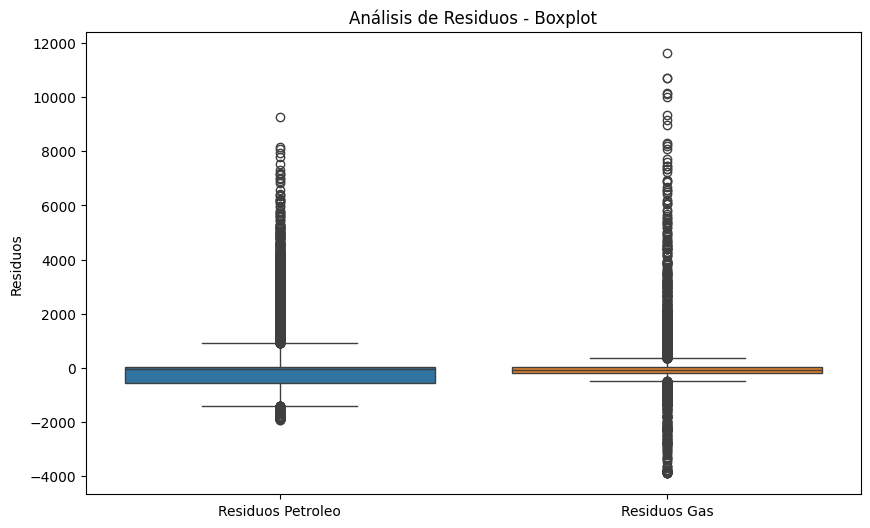

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
# Predecir en el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular los residuos
residuals = y_test - y_pred

# Crear un DataFrame con los residuos para facilitar el ploteo
residuals_df = pd.DataFrame(residuals, columns=['Residuos Petroleo', 'Residuos Gas'])

# Crear boxplots para los residuos
plt.figure(figsize=(10, 6))
sns.boxplot(data=residuals_df)
plt.title('Análisis de Residuos - Boxplot')
plt.ylabel('Residuos')
plt.show()


**Análisis de Scatterplot de Petróleo**

El gráfico compara los valores reales y predichos de la producción de petróleo. Lo ideal sería que los puntos se alineen en una diagonal (y = x), indicando predicciones precisas. Sin embargo, se observa una alta dispersión y agrupamientos horizontales, lo que sugiere que el modelo no logra capturar correctamente la variabilidad de los datos reales. Esto nos indica que el modelo necesita ajustes o más información para mejorar su capacidad predictiva.

**Análisis de Scatterplot de Gas**

El gráfico muestra la comparación entre los valores reales y predichos de la producción de gas. Se observa una alta dispersión y concentraciones horizontales de puntos, lo que revela que el modelo tiende a predecir siempre ciertos valores fijos, sin capturar adecuadamente la variabilidad real de los datos. Esto sugiere un posible problema de subajuste o limitaciones en las variables predictoras utilizadas.

**Análisis de Distribución de los Errores de Predicción**

El gráfico muestra la distribución de los errores de predicción (residuos) para la producción de petróleo y gas. En ambos casos, la mayoría de los errores se concentran cerca del valor 0, lo que indica que el modelo tiende a acertar en general. Sin embargo, también se observan colas largas y picos pronunciados, lo que sugiere la presencia de outliers y posibles problemas de ajuste. La distribución no es completamente simétrica, lo que indica que el modelo puede estar sobreestimando o subestimando sistemáticamente en algunos casos.

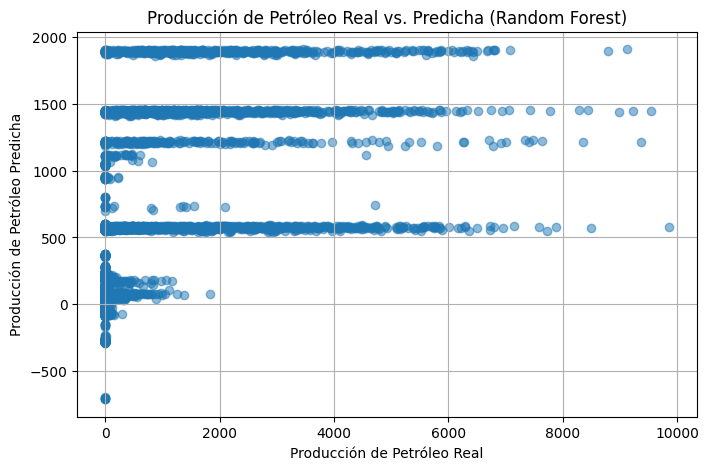

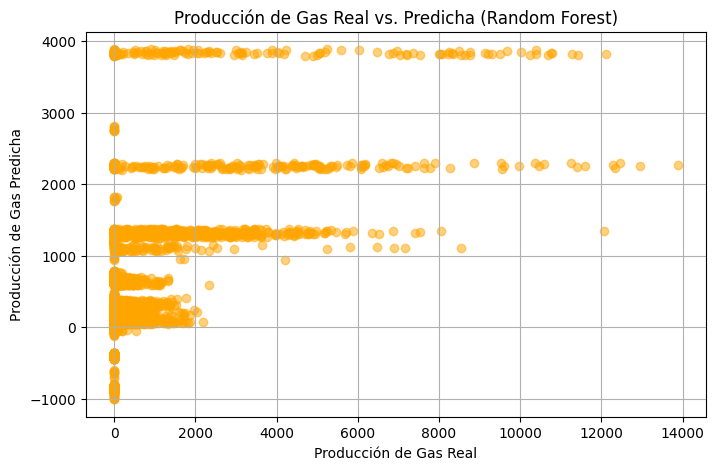

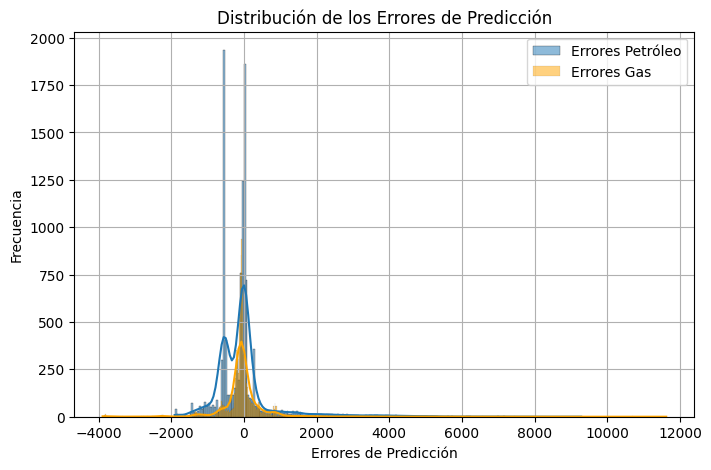

In [23]:
# Hacer predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Visualizar los resultados para 'Produccion de Petroleo' (primera columna de y)
plt.figure(figsize=(8, 5))
plt.scatter(y_test[:, 0], y_pred[:, 0], alpha=0.5)
plt.xlabel('Producción de Petróleo Real')
plt.ylabel('Producción de Petróleo Predicha')
plt.title('Producción de Petróleo Real vs. Predicha (Random Forest)')
plt.grid(True)
plt.show()

# Visualizar los resultados para 'Produccion de Gas' (segunda columna de y)
plt.figure(figsize=(8, 5))
plt.scatter(y_test[:, 1], y_pred[:, 1], alpha=0.5, color='orange')
plt.xlabel('Producción de Gas Real')
plt.ylabel('Producción de Gas Predicha')
plt.title('Producción de Gas Real vs. Predicha (Random Forest)')
plt.grid(True)
plt.show()

# visualizar la distribución de los errores
errors_petroleo = y_test[:, 0] - y_pred[:, 0]
errors_gas = y_test[:, 1] - y_pred[:, 1]

plt.figure(figsize=(8, 5))
sns.histplot(errors_petroleo, kde=True, label='Errores Petróleo')
sns.histplot(errors_gas, kde=True, label='Errores Gas', color='orange')
plt.xlabel('Errores de Predicción')
plt.ylabel('Frecuencia')
plt.title('Distribución de los Errores de Predicción')
plt.legend()
plt.grid(True)
plt.show()


### **Random Forest**

Random Forest es un modelo de aprendizaje automático basado en un conjunto de árboles de decisión. Funciona creando múltiples árboles con diferentes subconjuntos del dataset y promediando sus predicciones (en regresión). Esto mejora la precisión y robustez del modelo, reduciendo el riesgo de sobreajuste que suele tener un único árbol.

In [24]:
from sklearn.ensemble import RandomForestRegressor

In [25]:
from sklearn.metrics import mean_absolute_error

In [26]:
# Inicializo el modelo
regresor = RandomForestRegressor(criterion='absolute_error', random_state=25, n_estimators=20,max_depth=5,max_features='sqrt')

In [27]:
# Entreno el modelo
regresor.fit(X_train, y_train);

In [28]:
regresor.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'absolute_error',
 'max_depth': 5,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 20,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 25,
 'verbose': 0,
 'warm_start': False}

In [29]:
# Predigo los valores para el set de testeo
y_pred = regresor.predict(X_test)

y_pred

array([[1.102125e+03, 1.791250e+02],
       [1.100000e+00, 3.307500e+01],
       [2.577500e+01, 1.735000e+01],
       ...,
       [4.942000e+02, 6.505000e+01],
       [4.721750e+02, 6.320000e+01],
       [2.668250e+02, 5.637500e+01]])

**MAE (Mean Absolute Error)**

El MAE es una métrica que mide el error promedio entre los valores reales y los valores predichos por un modelo. Se calcula tomando el promedio de las diferencias absolutas. Es fácil de interpretar porque mantiene las mismas unidades que la variable objetivo. Cuanto menor es el MAE, mejor es la precisión del modelo.

In [30]:
# Calculo el error medio absoluto
mean_absolute_error(y_test, y_pred)

292.2105691687352

**Árbol de Decisión del Modelo Random Forest**

Este árbol muestra cómo el modelo toma decisiones dividiendo los datos en función de distintas variables, como profundidad, área de concesión, tipo de pozo, etc. En cada nodo, se realiza una división basada en un umbral que minimiza el error absoluto. Los valores en los nodos incluyen:

* samples: cantidad de muestras que llegan a ese nodo.

* value: valor promedio predicho.

* absolute_error: error absoluto promedio en ese nodo.

Esto ayuda a interpretar qué variables fueron más relevantes para las predicciones del modelo.

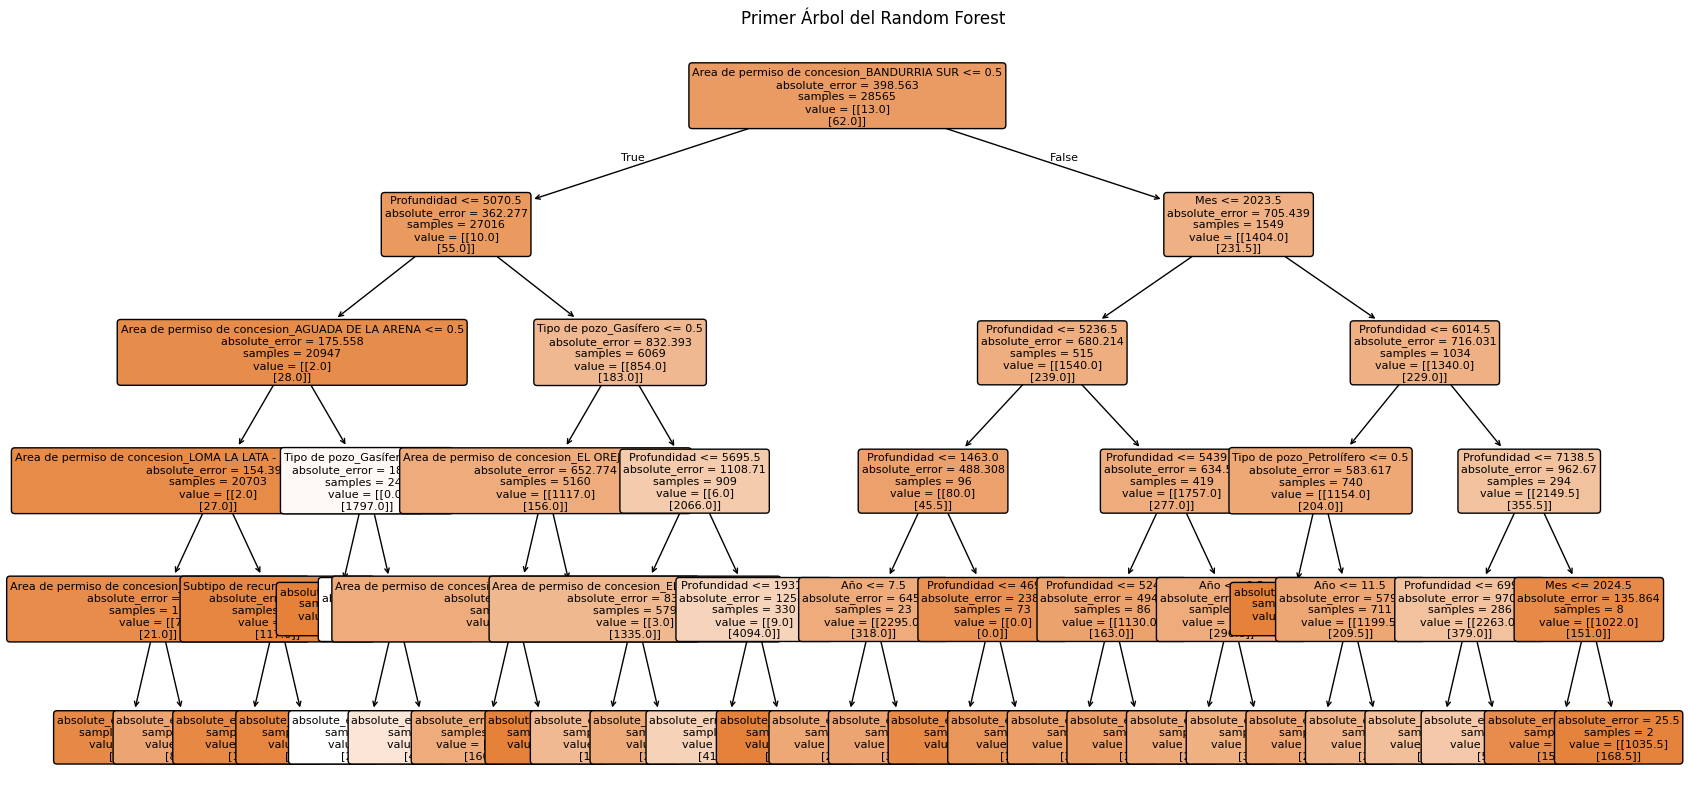

In [32]:
#gráfico de arbol

from sklearn.tree import plot_tree

if isinstance(regresor, RandomForestRegressor):
  # Visualiza el primer árbol del bosque
  plt.figure(figsize=(20, 10))
  plot_tree(regresor.estimators_[0],
            feature_names=lista_atributos.tolist(),
            filled=True,
            rounded=True,
            fontsize=8)
  plt.title("Primer Árbol del Random Forest")
  plt.show()
else:
  print("El modelo 'regresor' no es un RandomForestRegressor.")


### **Support Vector Machine**

Support Vector Machine (SVM) es un modelo de aprendizaje supervisado que utilizamos para predecir variables clave del sector energético, como la producción de petróleo y gas. SVM busca el hiperplano que mejor separa los datos históricos, maximizando el margen entre los distintos niveles de producción. Además, permite aplicar funciones núcleo (kernels) para capturar relaciones no lineales entre variables.

In [33]:
from sklearn.multioutput import MultiOutputRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error

In [34]:
multi_svr = MultiOutputRegressor(SVR())
multi_svr.fit(X_train, y_train)

MultiOutputRegressor(estimator=SVR())

In [35]:
multi_svr.get_params()

{'estimator__C': 1.0,
 'estimator__cache_size': 200,
 'estimator__coef0': 0.0,
 'estimator__degree': 3,
 'estimator__epsilon': 0.1,
 'estimator__gamma': 'scale',
 'estimator__kernel': 'rbf',
 'estimator__max_iter': -1,
 'estimator__shrinking': True,
 'estimator__tol': 0.001,
 'estimator__verbose': False,
 'estimator': SVR(),
 'n_jobs': None}

In [36]:
y_pred_svr = multi_svr.predict(X_test)

y_pred_svr

array([[332.19277021, 178.74938764],
       [-22.19795131,   6.38949047],
       [ 17.24897648,  27.80633262],
       ...,
       [115.69308334,  76.43439512],
       [ 84.09890095,  61.08887186],
       [182.09090308, 108.24418063]])

MAE (Mean Absolute Error) = 376.35 en el modelo Support Vector Machine (SVM) con outliers indica que, en promedio, el modelo comete un error de 376 unidades al predecir. Al incluir outliers, este valor refleja desviaciones más grandes, lo que puede afectar negativamente la precisión general del modelo.

In [37]:
# Calculo el error medio absoluto
mean_absolute_error(y_test, y_pred_svr)

376.35003363272415

**Producción de petróleo real vs predicha**

El gráfico muestra la comparación entre la producción de petróleo real (eje X) y la producción predicha por el modelo Support Vector Regression (SVR) (eje Y), incluyendo outliers.

* La mayoría de los puntos se agrupan por debajo de los 2000 m³ reales, con predicciones dispersas entre 0 y 500.

* Hay una gran cantidad de valores predichos cercanos a 0, lo que indica que el modelo no está capturando correctamente la variabilidad en los datos reales más altos.

* La forma dispersa y horizontal del gráfico refleja que el modelo tiene dificultades para ajustarse correctamente, probablemente afectado por los outliers.

No se observa una tendencia clara de que a mayor valor real corresponda un mayor valor predicho, lo que indica baja precisión del modelo en este contexto.

**Producción de gas real vs predicha**

Este gráfico muestra la relación entre la producción de gas real (eje X) y la producción de gas predicha por el modelo Support Vector Regression (SVR) (eje Y), incluyendo outliers.

* Se observa una fuerte concentración de puntos en valores reales menores a 2000, con predicciones agrupadas entre 0 y 250.

* La dispersión de los puntos y la ausencia de una tendencia clara indican que el modelo no logra capturar correctamente el patrón de los datos.

* Hay muchas predicciones constantes (horizontales) en ciertos valores, lo que sugiere que el modelo tiende a predecir valores repetitivos o planos, sin adaptarse bien a las variaciones reales.

* La presencia de valores extremos en el eje X (hasta más de 13.000) refuerza la influencia negativa de los outliers sobre la precisión del modelo.

En resumen: el modelo SVR no se ajusta bien a los datos reales de producción de gas, con predicciones poco sensibles a los valores reales y afectadas por outliers.

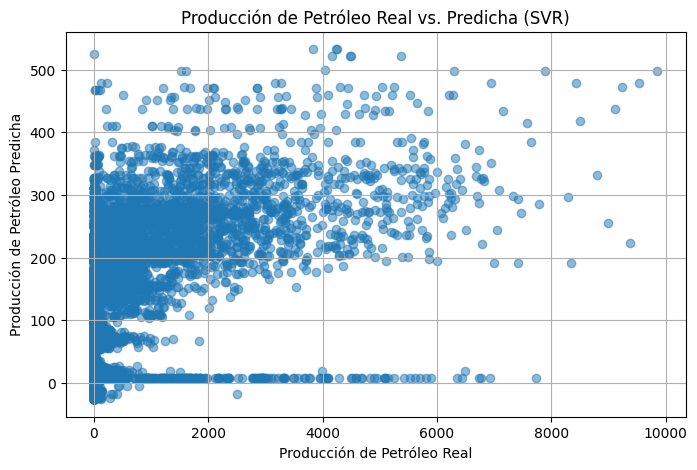

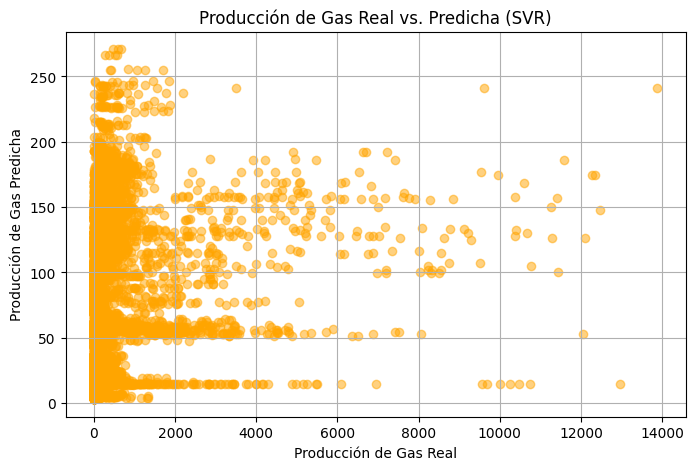

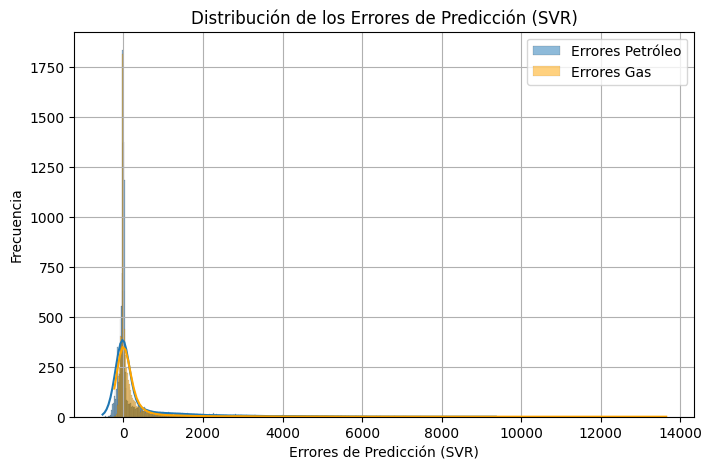

In [38]:
#gráfico support vector machine para este caso

# Visualizar los resultados para 'Produccion de Petroleo' (primera columna de y)
plt.figure(figsize=(8, 5))
plt.scatter(y_test[:, 0], y_pred_svr[:, 0], alpha=0.5)
plt.xlabel('Producción de Petróleo Real')
plt.ylabel('Producción de Petróleo Predicha')
plt.title('Producción de Petróleo Real vs. Predicha (SVR)')
plt.grid(True)
plt.show()

# Visualizar los resultados para 'Produccion de Gas' (segunda columna de y)
plt.figure(figsize=(8, 5))
plt.scatter(y_test[:, 1], y_pred_svr[:, 1], alpha=0.5, color='orange')
plt.xlabel('Producción de Gas Real')
plt.ylabel('Producción de Gas Predicha')
plt.title('Producción de Gas Real vs. Predicha (SVR)')
plt.grid(True)
plt.show()

# También puedes visualizar la distribución de los errores
errors_petroleo_svr = y_test[:, 0] - y_pred_svr[:, 0]
errors_gas_svr = y_test[:, 1] - y_pred_svr[:, 1]

plt.figure(figsize=(8, 5))
sns.histplot(errors_petroleo_svr, kde=True, label='Errores Petróleo')
sns.histplot(errors_gas_svr, kde=True, label='Errores Gas', color='orange')
plt.xlabel('Errores de Predicción (SVR)')
plt.ylabel('Frecuencia')
plt.title('Distribución de los Errores de Predicción (SVR)')
plt.legend()
plt.grid(True)
plt.show()


### **XGBoost**

XGBoost (Extreme Gradient Boosting) es un modelo de aprendizaje supervisado basado en árboles de decisión, diseñado para lograr alta precisión y eficiencia. Utiliza la técnica de boosting, que construye múltiples árboles de manera secuencial, donde cada árbol nuevo corrige los errores del anterior.

En este proyecto, XGBoost se aplica para predecir la producción de petróleo y la producción de gas, utilizando como variables explicativas datos históricos como las áreas de permiso de concesión, el subtipo de recurso, el tipo de pozo, etc.

Gracias a su capacidad para manejar relaciones no lineales y su mecanismo de regularización, XGBoost resulta especialmente útil para modelar fenómenos complejos del sector energético con gran precisión.



In [39]:
from xgboost import XGBRegressor

In [40]:

modelo_xgb = XGBRegressor(
    n_estimators=300,
    max_depth=3,
    learning_rate=0.3,
    subsample=1.0,
    colsample_bytree=1.0,
    objective='reg:squarederror',  # Para regresión
    random_state=42
)

In [41]:

modelo_xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=1.0, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.3, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=300, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [42]:

y_pred_xgb = modelo_xgb.predict(X_test)

**Interpretación de resultados del modelo XGBoost**

* **MAE (Error Absoluto Medio): 257.04**

En promedio, el modelo se equivoca por 257 unidades (por ejemplo, barriles o millones de m³, según la unidad que uses) al predecir la producción. Es una medida directa del error medio sin considerar su dirección (positivo o negativo).

* **RMSE (Raíz del Error Cuadrático Medio): 652.11**

Este valor penaliza más fuertemente los errores grandes. Un RMSE de 652 indica que hay algunas predicciones con errores más altos, lo cual puede estar afectando el rendimiento general del modelo.

* **R² (Coeficiente de Determinación): 0.606**

El modelo explica aproximadamente el 60,6% de la variabilidad observada en los datos reales de producción. Aunque no es perfecto, indica que el modelo capta una parte significativa de la relación entre las variables de entrada y la producción.

In [43]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred_xgb)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_xgb))  # Esto equivale a squared=False
r2 = r2_score(y_test, y_pred_xgb)

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")

MAE: 257.04196057867165
RMSE: 652.1100897701916
R²: 0.6055481082786068


### **Optimización: Gridsearch**

GridSearch es una técnica que prueba todas las combinaciones posibles de un conjunto definido de valores para los hiperparámetros del modelo. Evalúa cada combinación usando validación cruzada y selecciona la que da el mejor resultado según una métrica.

En el caso de XGBoost, algunos hiperparámetros comunes que se optimizan son:

* n_estimators: número de árboles a entrenar.

* max_depth: profundidad máxima de cada árbol.

* learning_rate: cuánto ajusta cada árbol nuevo los errores del anterior.

* subsample: proporción de muestras usadas en cada árbol.

* colsample_bytree: proporción de características utilizadas por árbol.

* gamma, reg_alpha, reg_lambda: parámetros de regularización.

In [44]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor

In [45]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 10],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.7, 0.9, 1],
    'colsample_bytree': [0.7, 0.9, 1]
}

xgb = XGBRegressor(random_state=42)

grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid,
                           cv=3, scoring='neg_mean_absolute_error', n_jobs=-1)

grid_search.fit(X_train, y_train)
print("Mejores parámetros:", grid_search.best_params_)

Mejores parámetros: {'colsample_bytree': 0.9, 'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 50, 'subsample': 1}


In [46]:
best_model = grid_search.best_estimator_


**Evaluación del Modelo XGBoost Optimizado**

**MAE (Error Absoluto Medio): 243.00**

En promedio, el modelo se equivoca por 243 unidades (m³) al predecir la producción. Es una medida simple y fácil de entender: cuanto más bajo, mejor.

**RMSE (Raíz del Error Cuadrático Medio): 655.32**

Este valor también mide el error, pero penaliza más los errores grandes. Un RMSE de 655 indica que existen algunas predicciones con errores más altos que afectan el promedio general.

**R² (Coeficiente de Determinación): 0.6001**

El modelo explica aproximadamente el 60% de la variabilidad en la producción real. Aunque no es un ajuste perfecto, muestra que XGBoost está captando una parte significativa de las relaciones en los datos, aunque todavía hay margen para mejorar.

In [47]:
y_pred = best_model.predict(X_test)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")

MAE: 243.00154950872272
RMSE: 655.3247425969278
R²: 0.6001389242366733


**Producción real vs. predicha (XGBoost Optimizado)**

Este gráfico muestra la comparación entre la producción real y la producción predicha utilizando un modelo XGBoost optimizado.

* A diferencia de los gráficos anteriores, aquí se observa una mayor alineación diagonal entre la producción real y la predicha, lo que indica un mejor desempeño del modelo.

* Aunque hay cierta dispersión, especialmente en valores altos (outliers), la mayoría de los puntos siguen una tendencia más coherente: a mayor producción real, mayor predicción.

* La nube de puntos está más centrada y compacta, sugiriendo que el modelo XGBoost optimizado logra capturar mejor la estructura del dato, incluso con valores extremos presentes.

En resumen: el modelo XGBoost optimizado ofrece predicciones más precisas y estables en comparación con el SVR, mostrando un ajuste más adecuado a la relación real entre las variables.

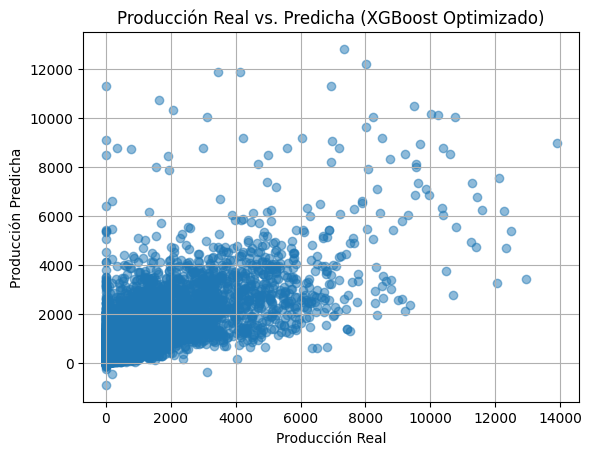

In [48]:

plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Producción Real")
plt.ylabel("Producción Predicha")
plt.title("Producción Real vs. Predicha (XGBoost Optimizado)")
plt.grid(True)
plt.show()


**Distribución de los residuos (errores de predicción) para los modelos aplicados a la producción de petróleo (izquierda) y gas (derecha)**

* Distribución de Residuos (Petróleo) - Gráfico izquierdo:
La mayoría de los residuos se concentran cerca de 0, lo que indica que el modelo tiene una tendencia general a predecir con cierta precisión.

Sin embargo, se observa una asimetría positiva (cola a la derecha), lo que sugiere que el modelo tiende a subestimar la producción en algunos casos (errores positivos altos).

También hay una cantidad no menor de errores negativos, lo que muestra cierta variabilidad en ambos sentidos.

* Distribución de Residuos (Gas) - Gráfico derecho:
La distribución está más centrada y simétrica, con un fuerte pico alrededor de 0.

Esto indica que el modelo aplicado a la producción de gas presenta menos errores extremos y mejor ajuste general que en el caso del petróleo.

Aunque también hay outliers, su frecuencia es menor y están más distribuidos.

* **Conclusión general:**

Ambos modelos presentan un comportamiento razonable, pero el modelo para gas muestra mayor precisión y menor dispersión en los errores.

En cambio, el modelo para petróleo tiene mayor variabilidad y algunos errores muy altos, que podrían mejorarse filtrando outliers o ajustando hiperparámetros.

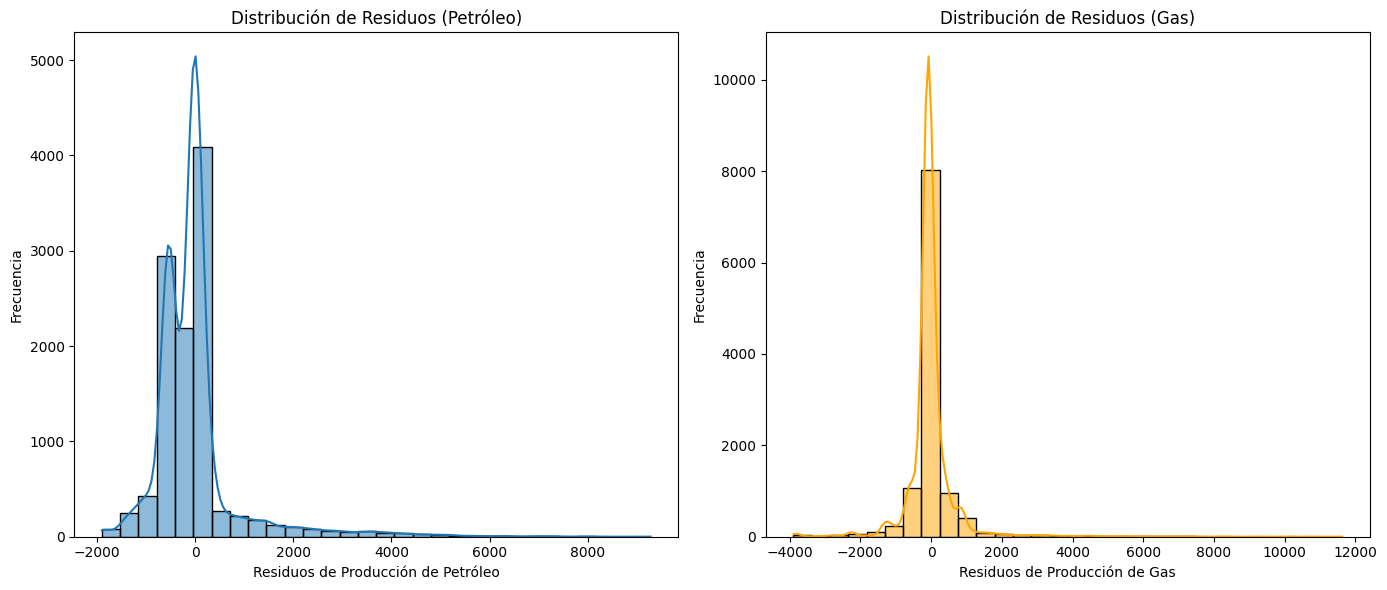

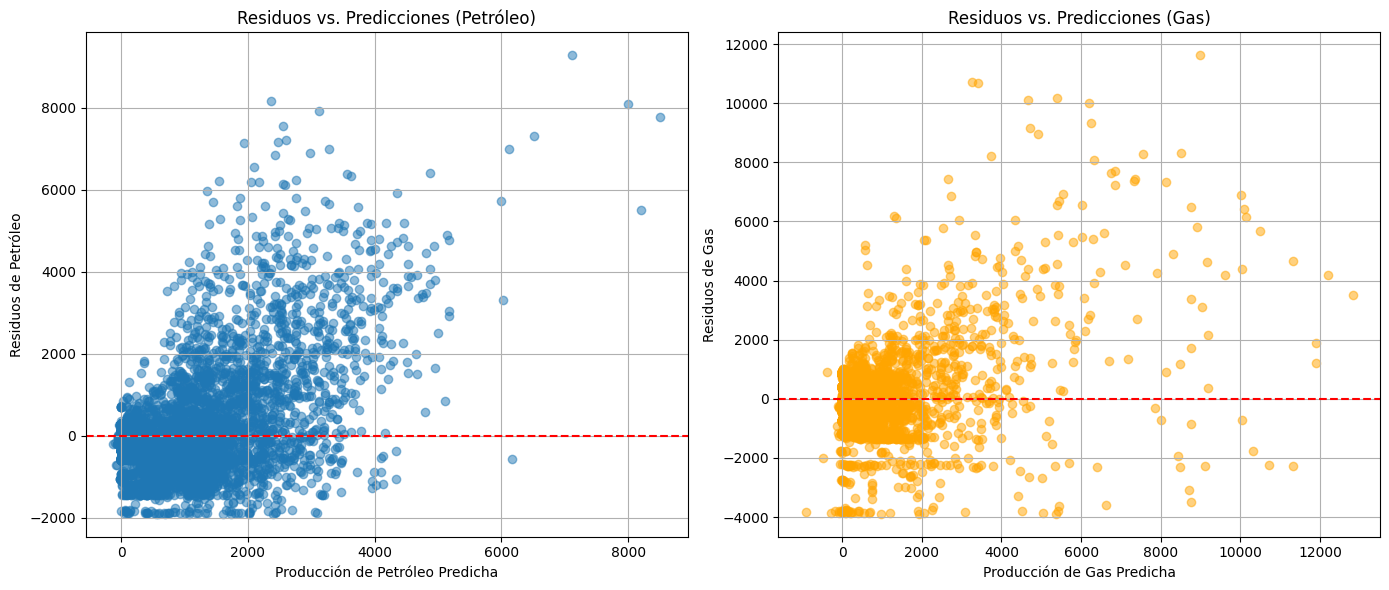

In [49]:
# grafico de produccion de petroleo y gas por separado y de los residuos

import matplotlib.pyplot as plt
# Visualizar los residuos de la regresión lineal para Petróleo y Gas
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(residuals_df['Residuos Petroleo'], kde=True, bins=30)
plt.title('Distribución de Residuos (Petróleo)')
plt.xlabel('Residuos de Producción de Petróleo')
plt.ylabel('Frecuencia')

plt.subplot(1, 2, 2)
sns.histplot(residuals_df['Residuos Gas'], kde=True, bins=30, color='orange')
plt.title('Distribución de Residuos (Gas)')
plt.xlabel('Residuos de Producción de Gas')
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

# Visualizar los residuos vs. valores predichos para identificar patrones
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_pred[:, 0], residuals_df['Residuos Petroleo'], alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Producción de Petróleo Predicha')
plt.ylabel('Residuos de Petróleo')
plt.title('Residuos vs. Predicciones (Petróleo)')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.scatter(y_pred[:, 1], residuals_df['Residuos Gas'], alpha=0.5, color='orange')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Producción de Gas Predicha')
plt.ylabel('Residuos de Gas')
plt.title('Residuos vs. Predicciones (Gas)')
plt.grid(True)

plt.tight_layout()
plt.show()